In [1]:
#icecube:
from icecube import dataio, dataclasses, simclasses
from icecube.icetray import OMKey
from icecube.dataclasses import *
from I3Tray import *
from icecube import icetray, dataio

# The usual:
import os
import numpy as np
import copy

#Plotting:
from matplotlib import rcParams
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import cm
import matplotlib.pyplot as plt

# Create GCD with only Upgrade, DeepCore and string 36 modules:

## 1. Define function to modify GCD

In [2]:
def geometrywriter(frame, geometry="I3Geometry"):

        det_geo = frame.Get(geometry)
        frame.Delete(geometry)
        
        
        dom_map= det_geo.omgeo
        
        for om,pos in dom_map:
            if om[0] > 78 or om[0] == 36:
                #ignore relevant modules:
                pass
            else:
                #remove/pop DOMs outside of DeepCore region:
                dom_map.pop(om)

        # Take new deom_map fr geometry:
        det_geo.omgeo=dom_map

        frame.Put(geometry,det_geo);

## 2. Run icetray

In [3]:
infileGCD="/data/sim/IceCubeUpgrade/geometries/GCDs/GeoCalibDetectorStatus_ICUpgrade.v55.mixed_mergedGeo.V5.i3.bz2"
outfileGCD="/home/fschmuckermaier/gcd/physics_volume_GCD.i3.bz2"
tray = I3Tray()
tray.AddModule("I3Reader", "reader",  Filename =infileGCD)
tray.AddModule(geometrywriter,"geometrywriter",Streams=[icetray.I3Frame.Geometry],geometry="I3Geometry")
tray.AddModule("I3Writer", "writer",Streams=[icetray.I3Frame.Geometry, icetray.I3Frame.Calibration,icetray.I3Frame.DetectorStatus],FileName =outfileGCD)
tray.AddModule("TrashCan","can")
tray.Execute()
tray.Finish()

## 3. Plot new GCD

In [4]:
#geometry = dataio.I3File("/data/sim/IceCubeUpgrade/geometries/GCDs/GeoCalibDetectorStatus_ICUpgrade.v55.mixed_mergedGeo.V4.i3.bz2")
geometry = dataio.I3File("/home/fschmuckermaier/gcd/physics_volume_GCD.i3.bz2")
gframe = geometry.pop_frame()  
geo = gframe["I3Geometry"] #access geo file via key

#Upgrade modules are stored in 'I3ModuleGeoMap':
geo_mod = gframe['I3ModuleGeoMap'] 
all_dom_keys = geo.omgeo.keys()


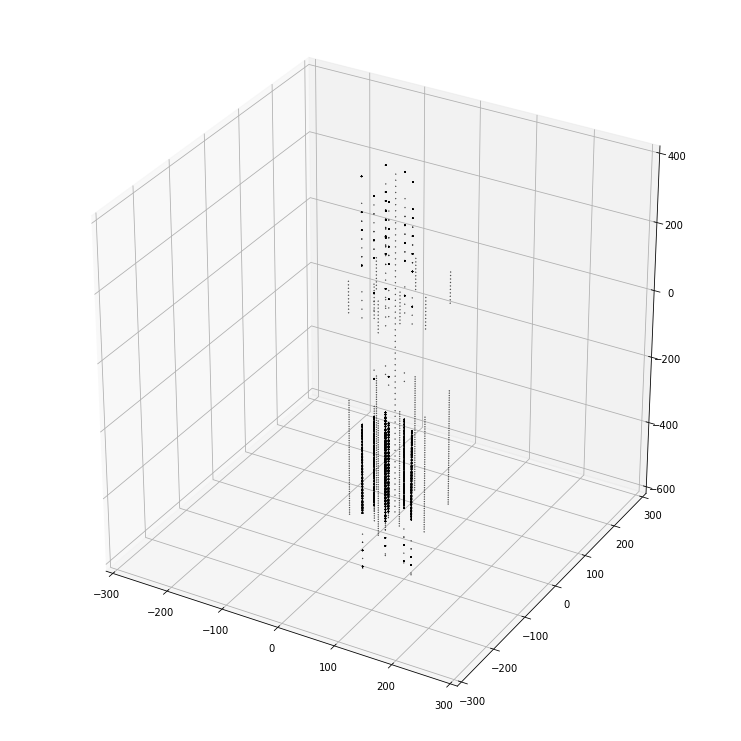

In [5]:
### Then plot ###
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
def get_colors(inp, colormap, vmin=None, vmax=None):
    norm = plt.Normalize(vmin, vmax)
    return colormap(norm(inp))

#DOM arrays for plotting DOMs as black dots
x_doms_d=[]
y_doms_d=[]
z_doms_d=[]

for i in all_dom_keys:
    if geo.omgeo[i].position.z < 500: #Ignore IceTop
        x_doms_d.append(geo.omgeo[i].position.x)
        y_doms_d.append(geo.omgeo[i].position.y)
        z_doms_d.append(geo.omgeo[i].position.z)

p=ax.scatter(x_doms_d,y_doms_d,z_doms_d,c='k',s=0.1,alpha=1)
ax.set_xlim(-300,300)
ax.set_ylim(-300,300)
ax.set_zlim(-600,400)

plt.show()